In [34]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
# load dataset diabetes
data_diabetes = load_diabetes(as_frame=True)

# membuat dataframe
df = pd.DataFrame(data_diabetes['frame'])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [36]:
# Melihat deskripsi dataset diabetes

print(data_diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

<Axes: >

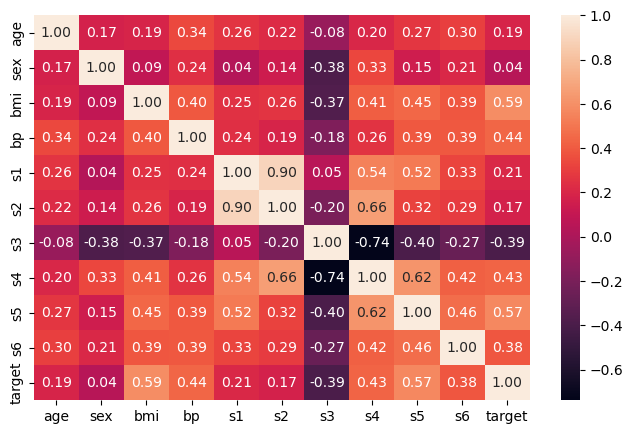

In [37]:
# Menampilkan korelasi antarkolom

plt.figure(figsize=(8,5))

corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f')

In [38]:
# Tentukan variable bebas dan terikat
bebas = ['bmi','bp','s5']
terikat = 'target'

X = df[bebas]
y = df[terikat]

In [39]:
# Split dataset menjadi [train, test]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
print(X_train.shape)
print(X_test.shape)

(309, 3)
(133, 3)


In [41]:
# Model regresi
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [42]:
# Mendapatkan nilai coef & intercept
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 150.72147656196663
Coefficients: 
 [670.62587019 312.99120968 441.11464154]


In [43]:
# Menampilkan hasil prediksi
pred = regr.predict(X_test)
print(pred)

[155.85843761 172.38544362 181.34571523 253.91553297 134.19758514
 116.59378689 284.63611412 220.82697538  82.85305434 141.36729905
 109.87838682 123.62459534  60.01896932 200.65301149 105.08941867
 132.69849797 233.51824663 245.02191911 178.05813735 221.566456
 196.4019237   93.67487005  76.84442692 198.98473127 162.4794801
 158.93920698 197.33498996 154.21526419  58.2537574  127.89369833
 175.22068193  87.21582125 145.43437716 168.48377193 165.23836766
 237.42416222 124.43260099 127.27102231 141.70243135  66.94072312
  72.23037913 131.66995563 145.98066728 128.19415924 170.99400164
  87.83310726  70.31119233 108.23702298  49.21583949 156.33434011
 153.62492639  62.06205    109.52707625 104.85883082 179.68020917
 166.58222382  94.755116   207.72389677 122.1130317   81.16048025
 183.93608705 184.96808982 161.54988138 126.75198429  97.35428783
 208.5624863  174.04930795 163.67873115 106.32546263 138.13998158
 170.83908264 198.88134198 198.66227315 134.64111929  72.3757928
 140.02103865 

In [44]:
# Evaluasi model regresi
rmse = np.sqrt(metrics.mean_squared_error(np.array(y_test), pred))

In [45]:
rmse

53.12601353034161